## Verimizi inceleyelim

In [33]:
#Nurunnisa Kaplan_200205073
import deap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Veri dosyasını yükleyip inceleyelim
file_path = r'./data_file_v2.csv'
data = pd.read_csv(file_path)

# Veri setinin ilk birkaç satırını görüntüleyelim
data.head()

,x,y
0,-5.0,-298.108727
1,-4.9,-255.602630
2,-4.8,-175.073026
3,-4.7,-230.140740
4,-4.6,-166.632522


## Veriyi Görselleştirdik

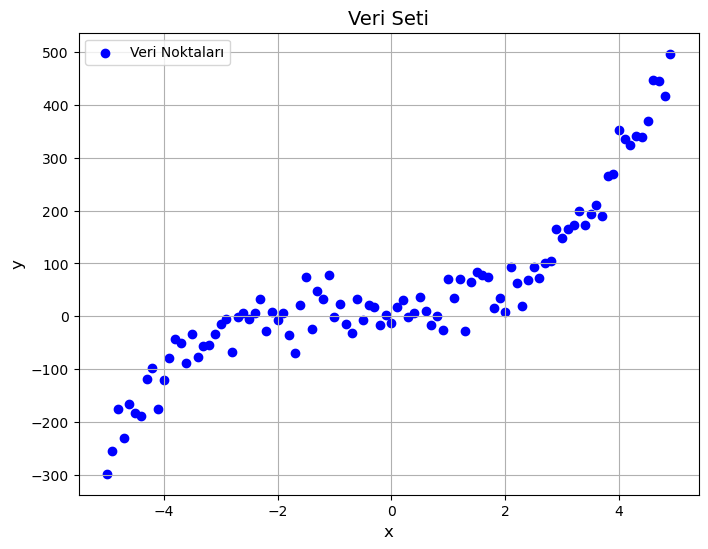

In [34]:
import matplotlib.pyplot as plt

# x ve y değişkenleri arasındaki ilişkiyi görselleştirmek amacıyla bir grafik (plot) oluşturdum.
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Veri Noktaları')
plt.title('Veri Seti', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

## Parçacık Sürü Optimizasyon Algoritması 

Polinom denklemi katsayıları: a = 3.0931, b = 4.7808, c = 0.1455, d = 11.3949
En iyi fitness değeri: 895.8869
PSO çalışma süresi: 0.1520 saniye


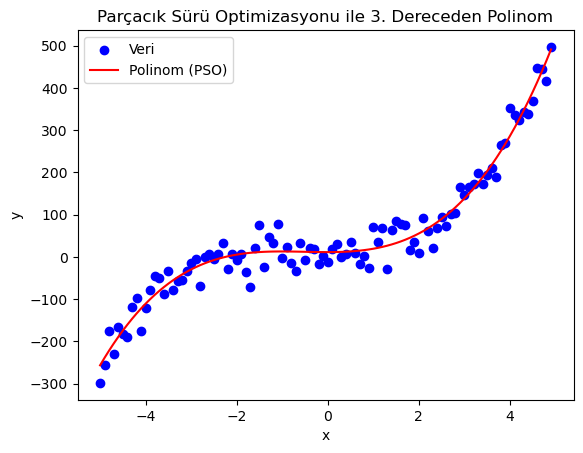

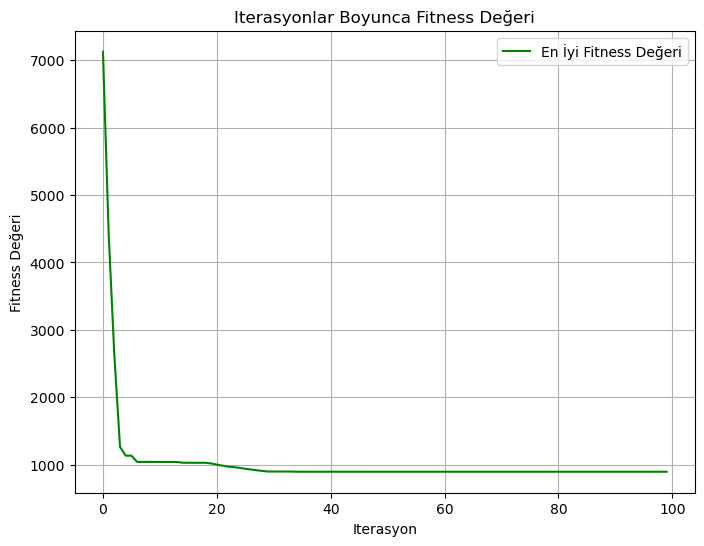

In [35]:
# PSO parametreleri
num_particles = 30
num_iterations = 100
w = 0.5  # atalet ağırlığı
c1 = 1.4  # bilişsel ağırlık
c2 = 1.4  # sosyal ağırlık

# Parçacık pozisyonları ve hızları
positions = np.random.uniform(-10, 10, (num_particles, 4))  # a, b, c, d
velocities = np.random.uniform(-1, 1, (num_particles, 4))
personal_best_positions = positions.copy()
personal_best_scores = np.full(num_particles, np.inf)

# Global en iyi değerler
global_best_position = None
global_best_score = np.inf

# Iterasyonlar boyunca en iyi fitness değeri ve parametrelerin kaydedilmesi
best_fitness_values = []

# Hata fonksiyonu (Mean Squared Error)
def fitness(position):
    a, b, c, d = position
    y_pred = a * x**3 + b * x**2 + c * x + d
    return np.mean((y - y_pred) ** 2)

# PSO döngüsü
pso_start_time = time.time()
for iteration in range(num_iterations):
    for i in range(num_particles):
        # Hata hesapla
        score = fitness(positions[i])
        # Kişisel en iyiyi güncelle
        if score < personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = positions[i]
        # Global en iyiyi güncelle
        if score < global_best_score:
            global_best_score = score
            global_best_position = positions[i]
    # Parçacıkları güncelle
    for i in range(num_particles):
        r1 = np.random.random(4)
        r2 = np.random.random(4)
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - positions[i])
            + c2 * r2 * (global_best_position - positions[i])
        )
        positions[i] += velocities[i]
    
    # En iyi fitness değerini kaydet
    best_fitness_values.append(global_best_score)
pso_end_time = time.time()
# Sonuçları göster
a, b, c, d = global_best_position
print(f"Polinom denklemi katsayıları: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}")
print(f"En iyi fitness değeri: {global_best_score:.4f}")
print(f"PSO çalışma süresi: {pso_end_time - pso_start_time:.4f} saniye")

# Veri ve bulunan polinomu çiz
y_pred = a * x**3 + b * x**2 + c * x + d
plt.scatter(x, y, label="Veri", color="blue")
plt.plot(np.sort(x), y_pred[np.argsort(x)], label="Polinom (PSO)", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Parçacık Sürü Optimizasyonu ile 3. Dereceden Polinom")
plt.show()

# Iterasyonlar boyunca fitness değerlerini görselleştir
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), best_fitness_values, color='green', label='En İyi Fitness Değeri')
plt.xlabel('Iterasyon')
plt.ylabel('Fitness Değeri')
plt.title('Iterasyonlar Boyunca Fitness Değeri')
plt.grid(True)
plt.legend()
plt.show()
